# Decision Tree

### 1. Load Dataset & Preprocess

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from pathlib import Path


filePath = Path(r"C:\Users\KIIT0001\Desktop\Coding\AD-L-\L5\heart.csv")
data = pd.read_csv(filePath)
print(data.head().to_string(index=False))

 age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
  52    1   0       125   212    0        1      168      0      1.0      2   2     3       0
  53    1   0       140   203    1        0      155      1      3.1      0   0     3       0
  70    1   0       145   174    0        1      125      1      2.6      0   0     3       0
  61    1   0       148   203    0        1      161      0      0.0      2   1     3       0
  62    0   0       138   294    1        1      106      0      1.9      1   3     2       0


### 2. Split features & target

In [8]:
X = data.drop("target", axis=1)   # Features
y = data["target"]                # Target

### 3. Train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### 4. Create and train Decision Tree model

In [10]:
dt_model = DecisionTreeClassifier(
    criterion="entropy",     # or "entropy"
    max_depth=5,          # controls overfitting
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

### 5. Make prediction

In [11]:
y_pred = dt_model.predict(X_test)

### 6. Model Evaluation

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8682926829268293

Confusion Matrix:
 [[83 17]
 [10 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       100
           1       0.85      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



### 7. Plot the decison tree

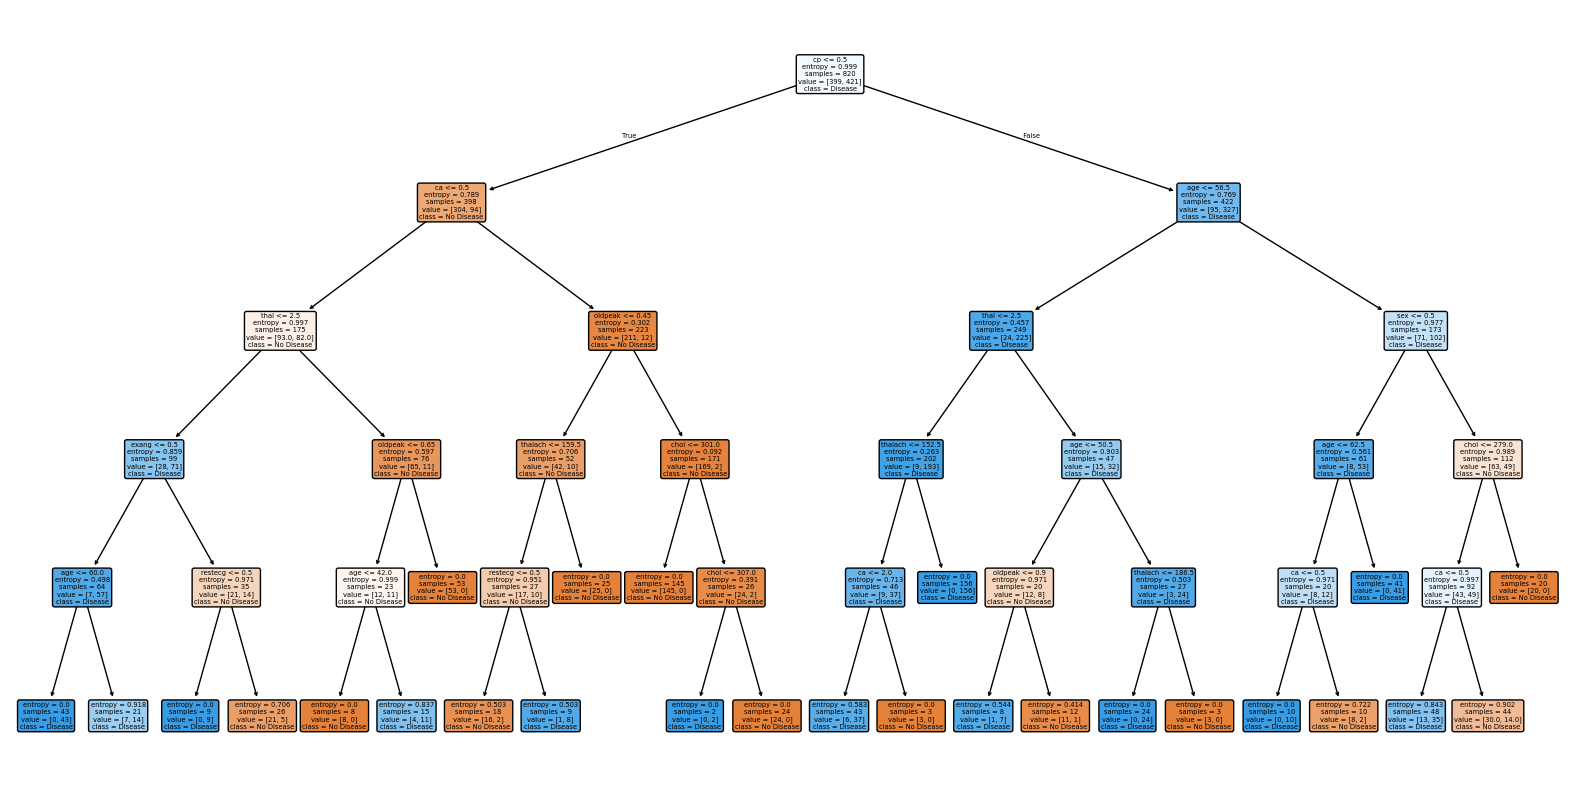

In [16]:
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True
)
plt.show()